In [33]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.cluster import KMeans 
import matplotlib.patches as mpatches


In [34]:
# Reading the data from the csv file
data = pd.read_csv('GPSapps/googleplaystore.csv')

In [35]:
# Clean data from negative, nan, zero values
data = data.replace([float('inf'), float('-inf'),str('NaN')], pd.NA).dropna()
data.head()
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


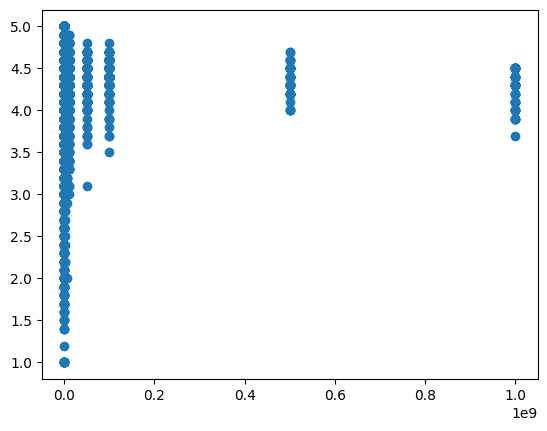

In [36]:
# Transforming non-numerical data to numerical data
data.dtypes

# reviews to int
# data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
# data['Size'] = data['Size'][0:-1]

# Convert 'Reviews' to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Remove invalid entries in 'Installs' and convert to integers
data['Installs'] = data['Installs'].astype(str)
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True).astype(int)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Convert 'Price' to numeric
data['Price'] = data['Price'].astype(str)
data['Price'] = data['Price'].str.replace('$', '', regex=True)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Convert 'Size' to numberic
data['Size'] = data['Size'].astype(str).fillna('')

# Function to normalize 'Size' to MB
# def size_to_mb(size):
#     if 'M' in size:
#         return float(size.replace('M', ''))
#     elif 'k' in size:
#         return float(size.replace('k', '')) / 1024
#     elif size == '' or size == 'Varies with device':
#         return None 
#     else:
#         return None  

# data['Size'] = data['Size'].apply(size_to_mb)

print(data.dtypes)
plt.scatter(data['Installs'],data['Rating'])


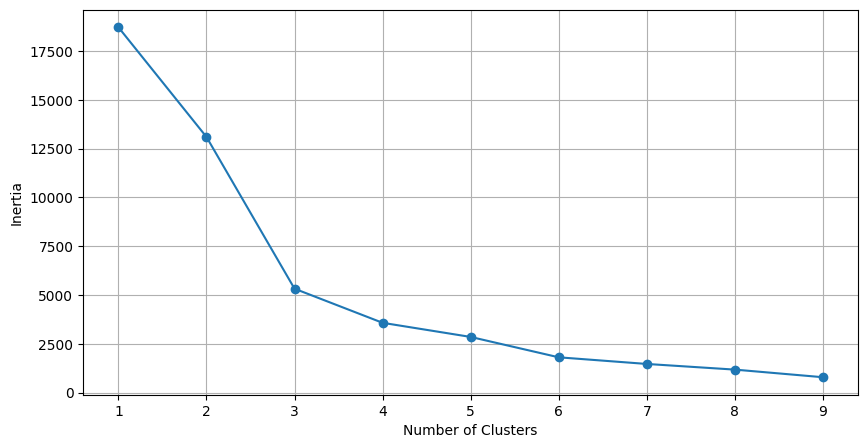

In [37]:
scaler = StandardScaler()

data[['Installs_T', 'Reviews_T', 'Rating_T']] = scaler.fit_transform(data[['Installs', 'Reviews', 'Rating']])

def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

optimise_k_means(data[['Installs_T', 'Rating_T']], 10)

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['Installs_T', 'Rating_T']])
data['kmeans_4'] = kmeans.labels_
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_T,Reviews_T,Rating_T,kmeans_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,-0.196126,-0.163511,-0.178244,3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,-0.190757,-0.163254,-0.566416,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,-0.141448,-0.135735,0.986272,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.351641,-0.094991,0.598100,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,-0.195140,-0.163254,0.209928,3


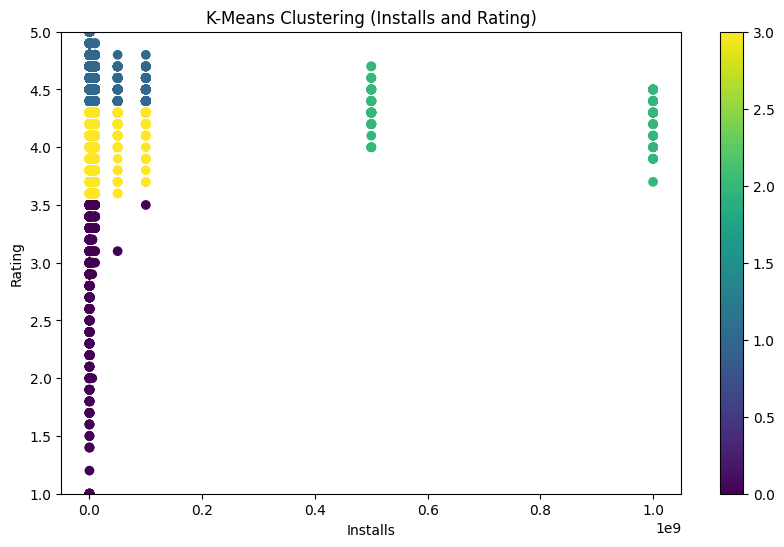

In [41]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=data['Installs'], y=data['Rating'], c=data['kmeans_4'])
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.ylim(1.0, 5.0)
plt.title('K-Means Clustering (Installs and Rating)') 
plt.colorbar(scatter)

# Show the plot
plt.show()

# Set display options to show all rows and columns 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

# Sort the DataFrame by the 'Cluster' column 
sorted_data = data.sort_values(by='kmeans_4') 


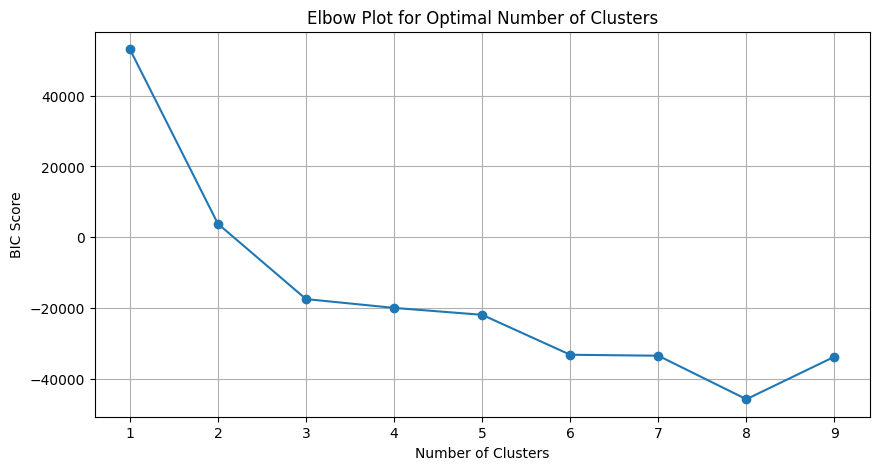

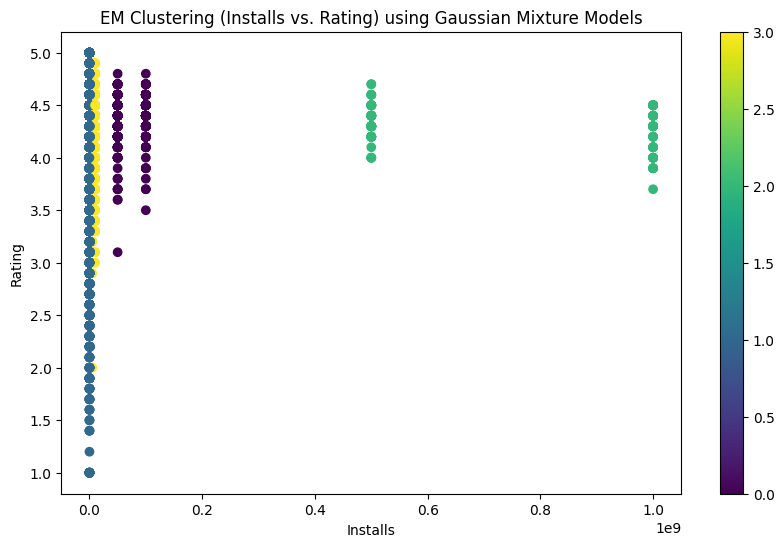

Cluster 0:
                                App             Category  Rating  Reviews  \
3            Sketch - Draw & Paint       ART_AND_DESIGN     4.5   215644   
139           Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6  2914724   
143                  Amazon Kindle  BOOKS_AND_REFERENCE     4.2   814080   
188              Indeed Job Search             BUSINESS     4.3   674730   
192  Docs To Go™ Free Office Suite             BUSINESS     4.1   217730   

                   Size   Installs  Type  Price Content Rating  \
3                   25M   50000000  Free    0.0           Teen   
139  Varies with device  100000000  Free    0.0           Teen   
143  Varies with device  100000000  Free    0.0           Teen   
188  Varies with device   50000000  Free    0.0       Everyone   
192  Varies with device   50000000  Free    0.0       Everyone   

                Genres    Last Updated         Current Ver  \
3         Art & Design    June 8, 2018  Varies with device   
139  Books

In [32]:
from sklearn.mixture import GaussianMixture

# Function to create an elbow plot to determine the optimal number of clusters using BIC
def optimise_gmm(data, max_k):
    bics = []
    ks = range(1, max_k)

    for k in ks:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        bics.append(gmm.bic(data))

    plt.figure(figsize=(10, 5))
    plt.plot(ks, bics, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('BIC Score')
    plt.grid(True)
    plt.title('Elbow Plot for Optimal Number of Clusters')
    plt.show()

# Create the elbow plot
optimise_gmm(data[['Installs_T', 'Rating_T']], 10)

# Select the optimal number of clusters (e.g., 4 clusters as identified from the plot)
optimal_n = 4

# Apply Gaussian Mixture Model for EM clustering with the optimal number of clusters
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
data['Cluster'] = gmm.fit_predict(data[['Installs_T', 'Rating_T']])

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Installs'], data['Rating'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('EM Clustering (Installs vs. Rating) using Gaussian Mixture Models')
plt.colorbar(scatter)
plt.show()

# Print the first 5 rows of each cluster
for cluster in range(optimal_n):
    print(f"Cluster {cluster}:\n", data[data['Cluster'] == cluster].head(), "\n")


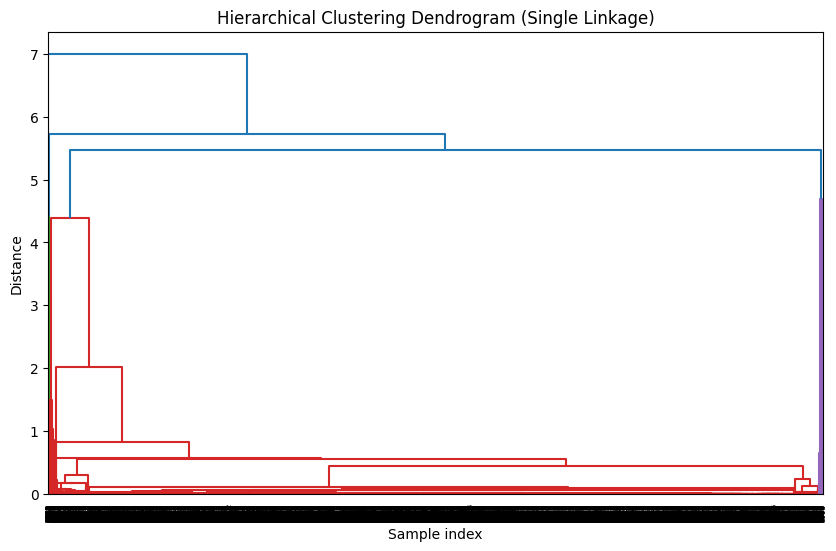

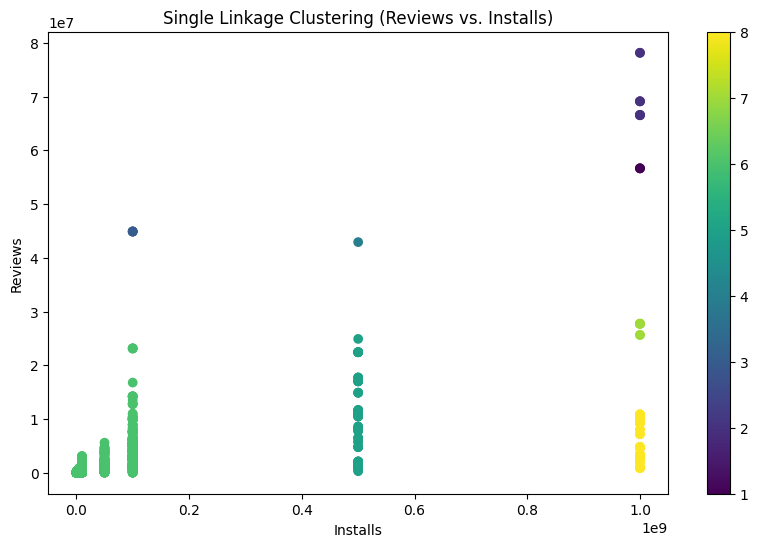

Cluster 6:
                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159   19M     10000  Free    0.0       Everyone   
1      967   14M    500000  Free    0.0       Everyone   
2    87510  8.7M   5000000  Free    0.0       Everyone   
3   215644   25M  50000000  Free    0.0           Teen   
4      967  2.8M    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pr

In [18]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

# Select relevant features for clustering
features = data[['Reviews', 'Installs']]

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Perform single linkage hierarchical clustering
Z = linkage(standardized_features, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.show()

# Extract clusters using a maximum distance threshold
max_d = 3  # Example threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Assign clusters to the data
data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Installs'], data['Reviews'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.title('Single Linkage Clustering (Reviews vs. Installs)')
plt.colorbar(scatter)
plt.show()

# Print the first 5 rows of each cluster 
for cluster in data['Cluster'].unique(): 
    print(f"Cluster {cluster}:\n", data[data['Cluster'] == cluster].head(), "\n")
